In [43]:
from spec_id import Gen_spec, Scale_model, Median_w_Error_cont, Iterative_stacking, Analyze_LH_lwa, \
    Median_w_Error, Identify_stack,Likelihood_contours
from scipy.interpolate import interp1d, interp2d
import matplotlib.pyplot as plt
from glob import glob
from matplotlib import gridspec
from astropy.io import fits
import seaborn as sea
import numpy as np
import pandas as pd
import grizli
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.2, as_cmap=True)

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [41]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')
galDB = galDB.query('ids != 14713 and ids != 38126')
lzDB = galDB.query('hi_res_specz < 1.16')
mzDB = galDB.query('1.16 < hi_res_specz < 1.3')
hzDB = galDB.query('1.3 < hi_res_specz < 1.45')
uhzDB = galDB.query('1.45 < hi_res_specz')

metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
M,A=np.meshgrid(metal,age)

In [24]:
galDB

,gids,ids,ra,dec,hi_res_specz,lmass,tau,Z_f,Z_-_sig_f,Z_+_sig_f,...,t_+_sig_cal,tx_cal,tx_-_sig_cal,tx_+_sig_cal,Zx_cal,Zx_-_sig_cal,Zx_+_sig_cal,Z_cal,Z_-_sig_cal,Z_+_sig_cal
49,n16758,16758,189.162357,62.224840,1.014,10.83,0.00,0.020,0.001,0.002,...,0.666,3.916834,0.716433,0.749499,0.013952,0.001852,0.002693,0.014,0.002,0.003
50,n17070,17070,189.268086,62.226445,1.192,10.92,8.48,0.011,0.003,0.004,...,0.516,2.043086,0.518036,0.573146,0.011427,0.002918,0.006565,0.012,0.003,0.006
58,n19442,19442,189.123036,62.237460,1.101,10.10,8.90,0.015,0.009,0.010,...,1.041,2.583166,0.771543,1.058116,0.013671,0.008192,0.010717,0.014,0.009,0.010
61,n21156,21156,189.239409,62.247548,1.251,11.16,8.30,0.020,0.005,0.004,...,0.307,2.098196,0.418838,0.308617,0.023884,0.003928,0.003984,0.024,0.004,0.004
62,n21427,21427,189.368121,62.247344,1.514,10.73,8.48,0.019,0.010,0.007,...,0.514,2.329659,0.584168,0.584168,0.017543,0.008810,0.008529,0.018,0.009,0.008
69,n23435,23435,189.338306,62.256571,1.134,10.27,8.60,0.014,0.006,0.009,...,0.827,3.112224,0.760521,0.914830,0.012044,0.005780,0.010156,0.013,0.007,0.009
86,n32566,32566,189.161280,62.307577,1.150,10.61,8.70,0.020,0.008,0.006,...,0.395,2.032064,0.683367,0.462926,0.021190,0.008136,0.006004,0.022,0.009,0.005
96,n34694,34694,189.147840,62.323647,1.145,10.94,8.30,0.015,0.006,0.005,...,0.963,2.803607,0.462926,0.958918,0.014345,0.004882,0.005667,0.015,0.006,0.005
107,n37686,37686,189.274474,62.360820,1.258,10.89,8.48,0.016,0.003,0.004,...,0.751,3.068136,0.473948,0.782565,0.014681,0.003928,0.005667,0.015,0.004,0.005
212,s35774,35774,53.158775,-27.742385,1.223,10.86,8.90,0.008,0.003,0.003,...,0.378,2.803607,0.859719,0.473948,0.008397,0.004433,0.009876,0.009,0.005,0.009


In [25]:
spec1 = fits.open('../Grizli_extract/ForVince/j033239-274648_40597.1D.fits')
spec3 = Gen_spec(galDB.gids[230],galDB.hi_res_specz[230])

../data/galaxy_flts/s40597_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/s40597_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/s40597_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/s40597_flt: save ../data/galaxy_flts/s40597_flt.detect_seg.fits, ../data/galaxy_flts/s40597_flt.detect.cat


In [17]:
spec1.info()

Filename: ../Grizli_extract/ForVince/j033239-274648_39170.1D.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      19   ()      
  1  G141        BinTableHDU     36   146R x 6C   [D, D, D, D, D, D]   
  2  G102        BinTableHDU     52   179R x 6C   ['D', 'D', 'D', 'D', 'D', 'D']   


In [10]:
spec1[2].columns

ColDefs(
    name = 'wave'; format = 'D'; unit = 'Angstrom'
    name = 'flux'; format = 'D'; unit = 'count s-1'
    name = 'err'; format = 'D'; unit = 'count s-1'
    name = 'flat'; format = 'D'; unit = 'Angstrom cm2 count erg-1'
    name = 'line'; format = 'D'; unit = 'count s-1'
    name = 'cont'; format = 'D'; unit = 'count s-1'
)

In [26]:
wv=spec1[2].data['wave']
fl=spec1[2].data['flux']/spec1[2].data['flat']
er=spec1[2].data['err']/spec1[2].data['flat']
IDX = [U for U in range(len(wv)) if 8000 < wv[U] < 11400]

/Users/Vince.ec/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in divide
  from ipykernel import kernelapp as app
/Users/Vince.ec/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


<Container object of 3 artists>

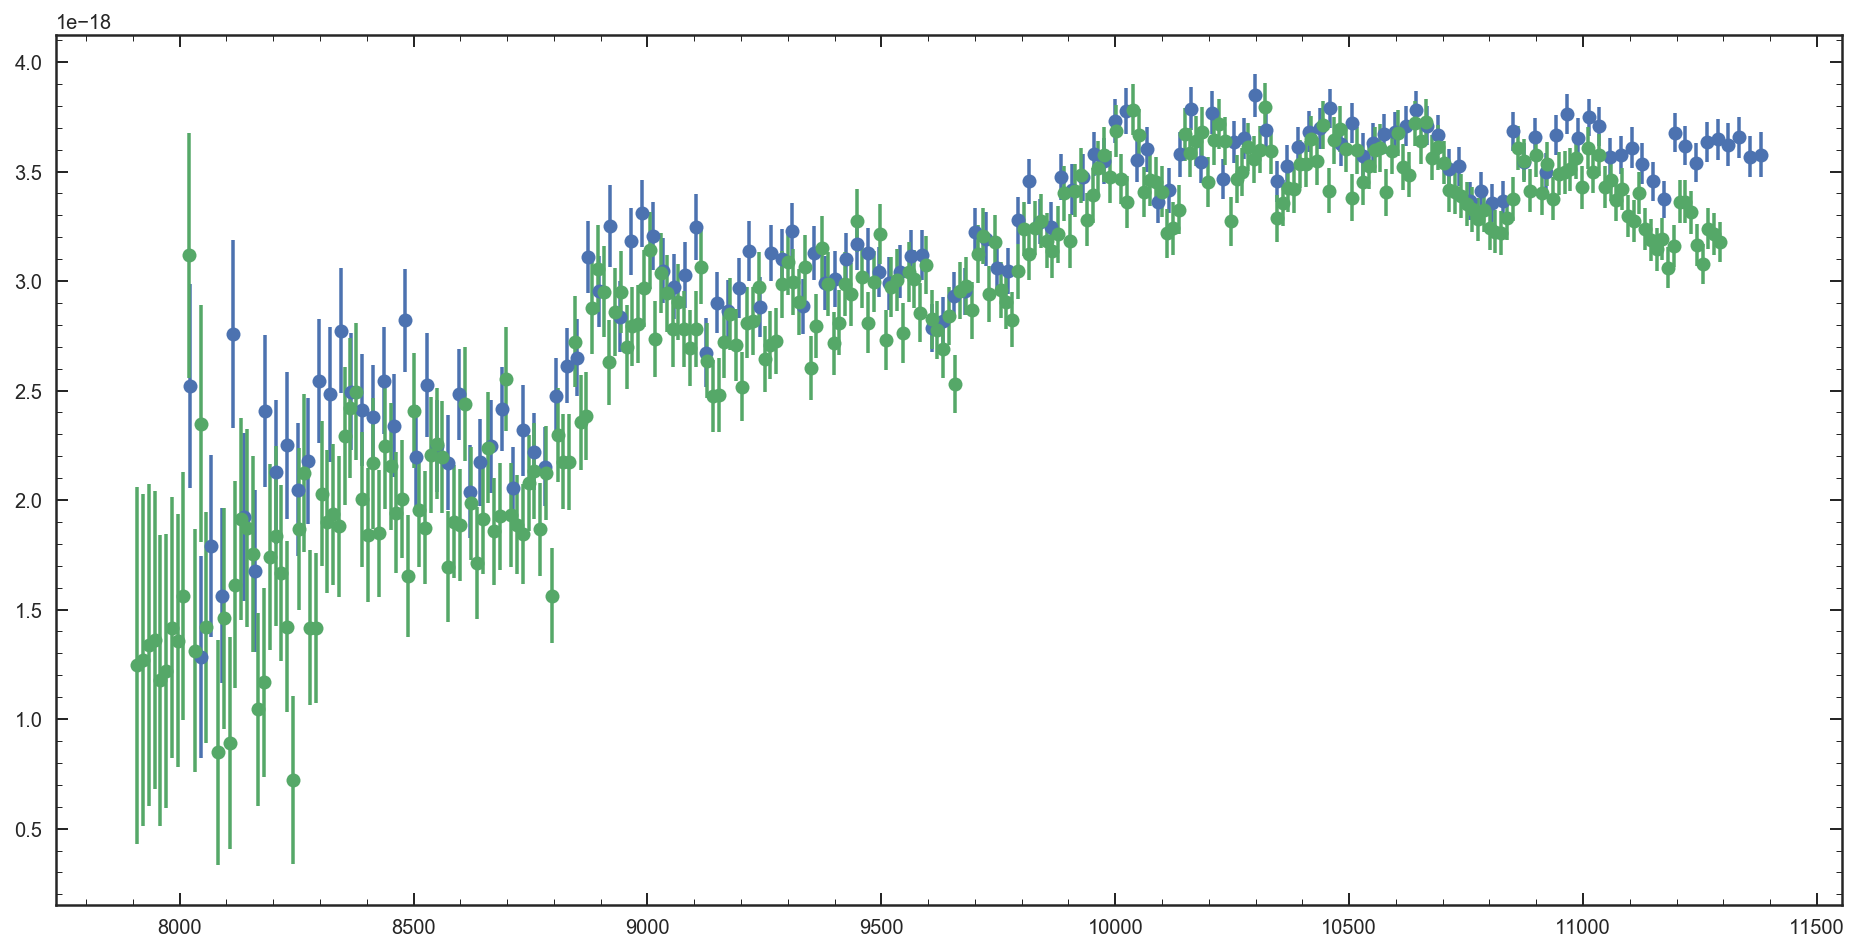

In [27]:
plt.figure(figsize=[16,8])
plt.errorbar(wv[IDX],fl[IDX],er[IDX],fmt='o')
plt.errorbar(spec3.gal_wv,spec3.gal_fl*1.17,spec3.gal_er,fmt='o')

# plt.plot(spec1[2].data['wave'],spec1[2].data['flat'])

In [49]:
Z1,PZ1 = np.load('../chidat/s40597_dtau_Z_pos_lwa_3.npy')
t1,Pt1 = np.load('../chidat/s40597_dtau_t_pos_lwa_3.npy')

Z2,PZ2 = np.load('../chidat/s40597_griz_ex_Z_pos.npy')
t2,Pt2 = np.load('../chidat/s40597_griz_ex_t_pos.npy')


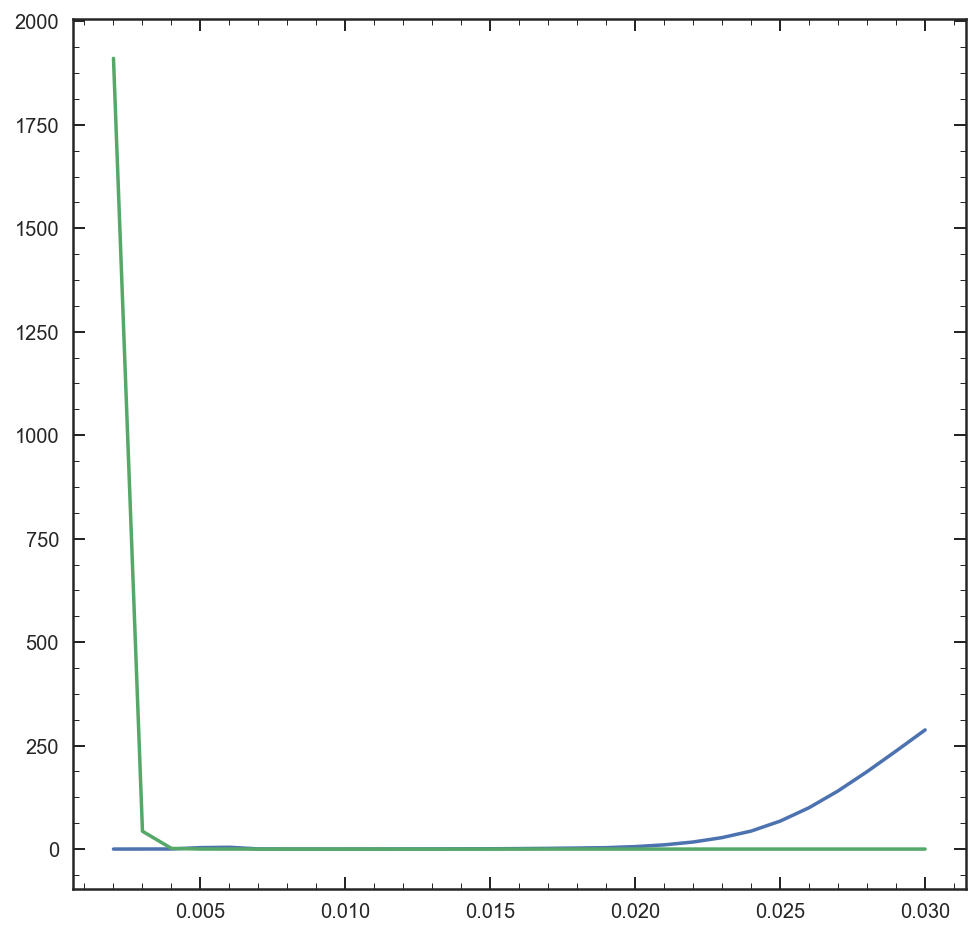

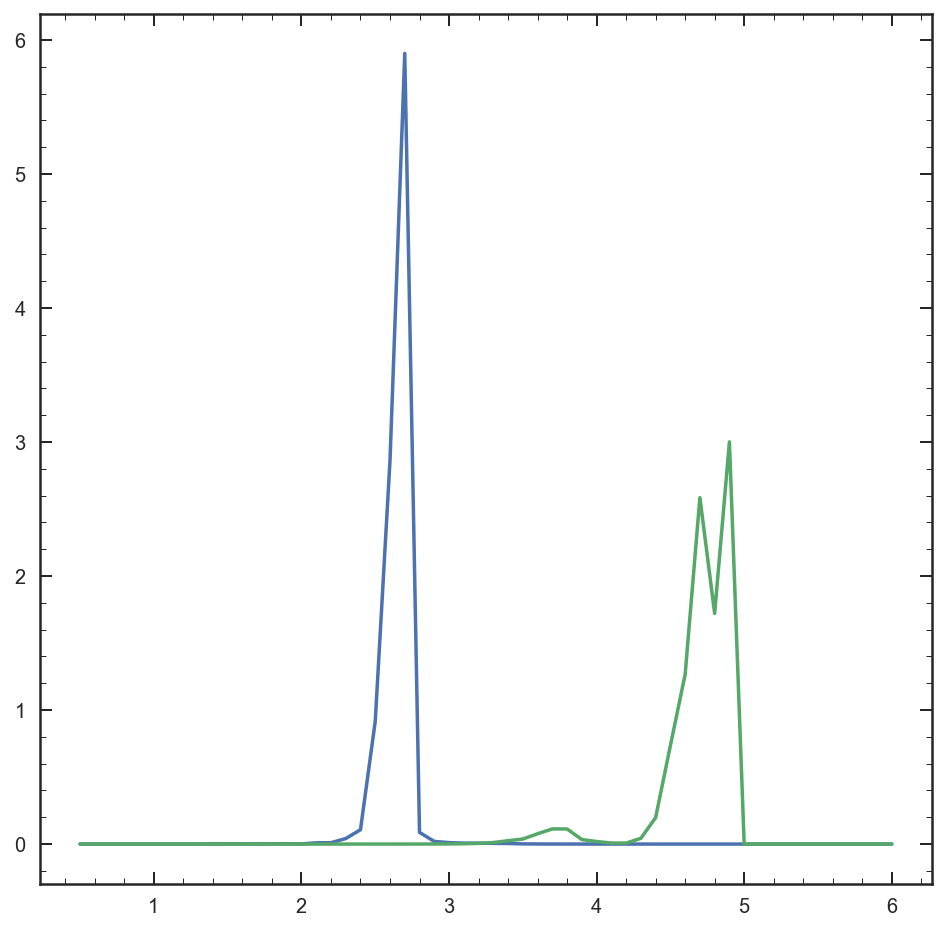

In [50]:
plt.figure(figsize=[8,8])
plt.plot(Z1,PZ1)
plt.plot(Z2,PZ2)

plt.figure(figsize=[8,8])
plt.plot(t1,Pt1)
plt.plot(t2,Pt2)

In [18]:
class Gen_spec_test(object):
    def __init__(self, galaxy_id, redshift, fits_file, pad=100, delayed = True,minwv = 8000, maxwv = 11400):
        self.galaxy_id = galaxy_id
        self.redshift = redshift
        self.pad = pad
        self.delayed = delayed

        """ 
        self.flt_input - grism flt (not image flt) which contains the object you're interested in modeling, this
                         will tell Grizli the PA
        **
        self.galaxy_id - used to id galaxy and import spectra
        **
        self.pad - Grizli uses this to add extra pixels to the edge of an image to account for galaxies near the 
                   edge, 100 is usually enough
        **
        self.beam - information used to make models
        **
        self.wv - output wavelength array of simulated spectra
        **
        self.fl - output flux array of simulated spectra
        """

        if self.galaxy_id == 's35774':
            maxwv = 11100
        
        sp = fits.open('../Grizli_extract/ForVince/{0}'.format(fits_file))

        gal_wv=sp[2].data['wave']
        gal_fl=sp[2].data['flux']/sp[2].data['flat']
        gal_er=sp[2].data['err']/sp[2].data['flat']
        IDX = [U for U in range(len(gal_wv)) if 7900 < gal_wv[U] < 11300]
                
        self.flt_input = '../data/galaxy_flts/%s_flt.fits' % self.galaxy_id

        self.gal_wv_rf = gal_wv[IDX] / (1 + self.redshift)
        self.gal_wv = gal_wv[IDX]
        self.gal_fl = gal_fl[IDX]
        self.gal_er = gal_er[IDX]

        self.gal_wv_rf = self.gal_wv_rf[self.gal_fl > 0 ]
        self.gal_wv = self.gal_wv[self.gal_fl > 0 ]
        self.gal_er = self.gal_er[self.gal_fl > 0 ]
        self.gal_fl = self.gal_fl[self.gal_fl > 0 ]

        ## Create Grizli model object
        sim_g102 = grizli.model.GrismFLT(grism_file='', verbose=False,
                                         direct_file=self.flt_input,
                                         force_grism='G102', pad=self.pad)

        sim_g102.photutils_detection(detect_thresh=.025, verbose=True, save_detection=True)

        keep = sim_g102.catalog['mag'] < 29
        c = sim_g102.catalog

        sim_g102.compute_full_model(ids=c['id'][keep], mags=c['mag'][keep], verbose=False)

        ## Grab object near the center of the image
        dr = np.sqrt((sim_g102.catalog['x_flt'] - 579) ** 2 + (sim_g102.catalog['y_flt'] - 522) ** 2)
        ix = np.argmin(dr)
        id = sim_g102.catalog['id'][ix]

        ## Spectrum cutouts
        self.beam = grizli.model.BeamCutout(sim_g102, beam=sim_g102.object_dispersers[id]['A'], conf=sim_g102.conf)

    def Sim_spec(self, metal, age, tau):
        import pysynphot as S
        if self.delayed == True:
            model = '../../../fsps_models_for_fit/fsps_spec/m%s_a%s_dt%s_spec.npy' % (metal, age, tau)
        else:
            model = '../../../fsps_models_for_fit/fsps_spec/m%s_a%s_t%s_spec.npy' % (metal, age, tau)

        wave, fl = np.load(model)
        spec = S.ArraySpectrum(wave, fl, fluxunits='flam')
        spec = spec.redshift(self.redshift).renorm(1., 'flam', S.ObsBandpass('wfc3,ir,f105w'))
        spec.convert('flam')
        ## Compute the models
        self.beam.compute_model(spectrum_1d=[spec.wave, spec.flux])

        ## Extractions the model (error array here is meaningless)
        w, f, e = self.beam.beam.optimal_extract(self.beam.model, bin=0)

        ifl = interp1d(w, f)(self.gal_wv)

        ## Get sensitivity function
        fwv, ffl = [self.beam.beam.lam, self.beam.beam.sensitivity / np.max(self.beam.beam.sensitivity)]
        filt = interp1d(fwv, ffl)(self.gal_wv)

        adj_ifl = ifl /filt

        C = Scale_model(self.gal_fl, self.gal_er, adj_ifl)

        self.fl = C * adj_ifl

    def Median_spec(self, metal, age, tau_array):

        chi = []
        for i in range(len(tau_array)):
            self.Sim_spec(metal, age, tau_array[i])
            chi.append(Identify_stack(self.gal_fl, self.gal_er, self.fl))


        self.bfmetal = metal
        self.bfage = age
        self.bftau = tau_array[np.argmin(chi)]
        self.Sim_spec(metal, age, tau_array[np.argmin(chi)])


In [19]:
spec_t = Gen_spec_test('s40597', 1.221, 'j033239-274648_40597.1D.fits')
spec = Gen_spec('s40597', 1.221)

/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in divide
/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in divide


../data/galaxy_flts/s40597_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/s40597_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/s40597_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/s40597_flt: save ../data/galaxy_flts/s40597_flt.detect_seg.fits, ../data/galaxy_flts/s40597_flt.detect.cat
../data/galaxy_flts/s40597_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/s40597_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/s40597_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/s40597_flt: save ../data/galaxy_flts/s40597_flt.detect_seg.fits, ../dat

In [27]:
print Median_w_Error(PZ1,Z1)
print Median_w_Error(Pt1,t1)

print Median_w_Error(PZ2,Z2)
print Median_w_Error(Pt2,t2)

(0.028, 0.003, 0.00099999999999999999996)
(2.7, 0.12799999999999999999, 0.037000000000000000001)
(0.003, 0.00099999999999999999996, -0.0)
(4.8000000000000000002, 0.288, 0.109)


In [30]:
spec.Median_spec(0.028,2.7,tau)
spec_t.Median_spec(0.003,4.8,tau)


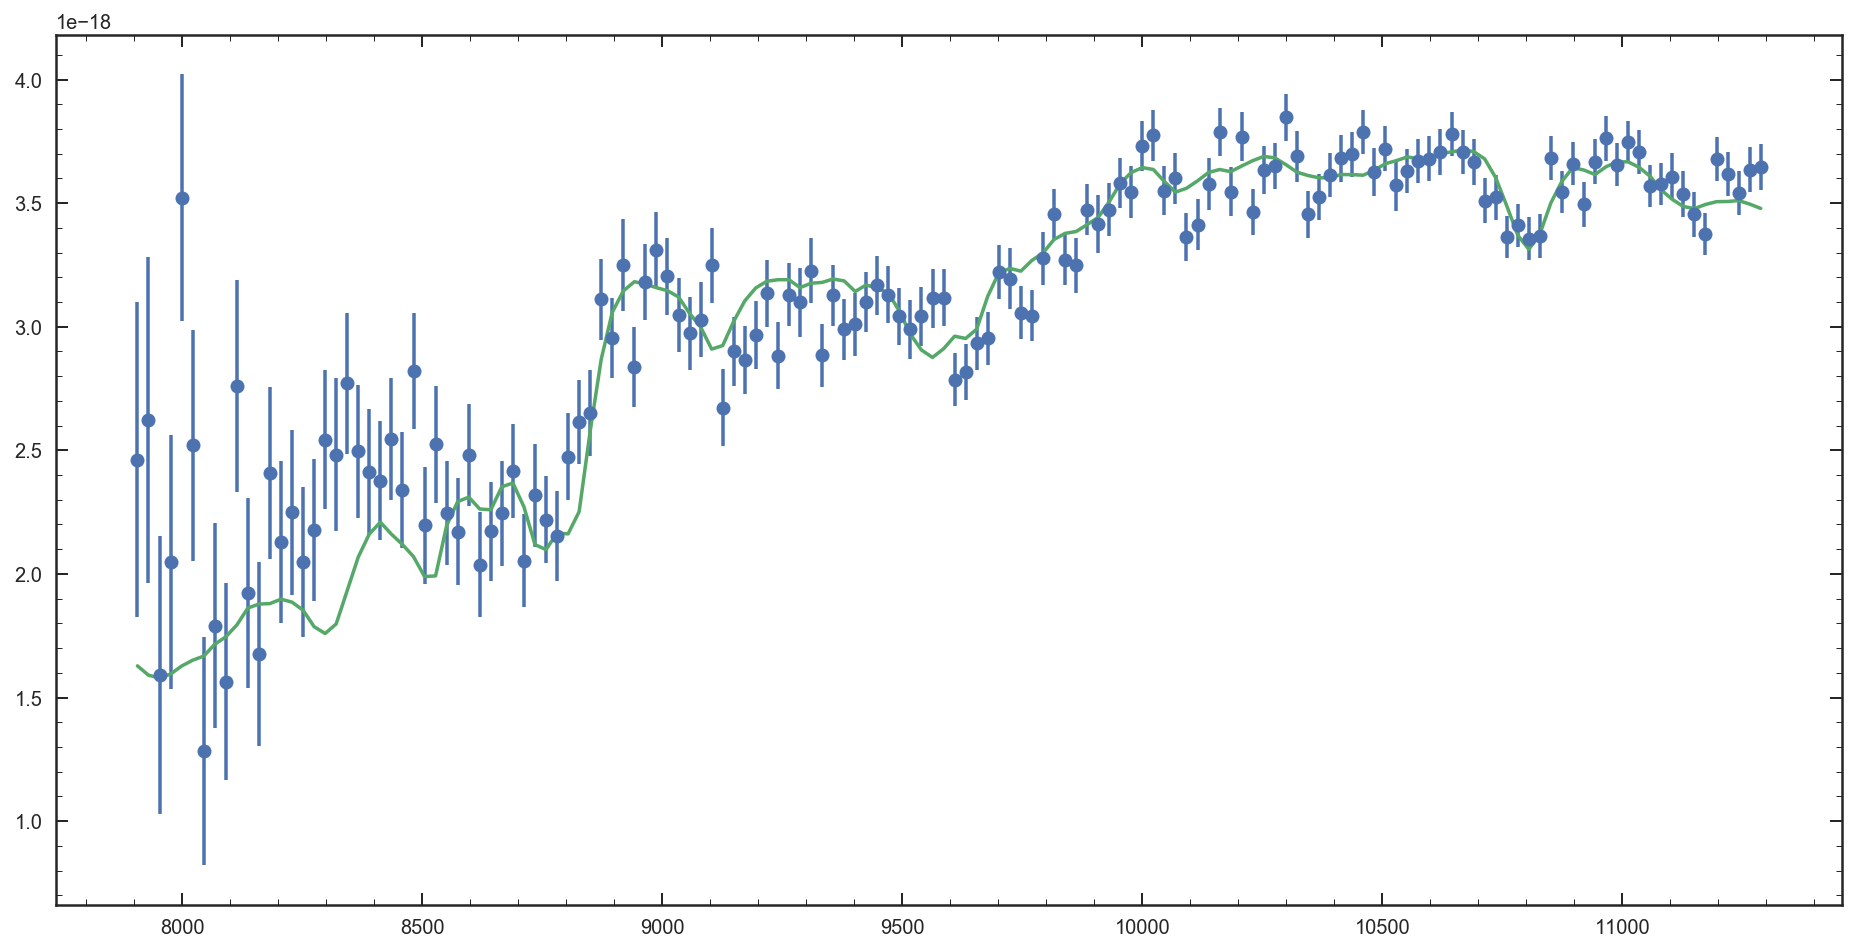

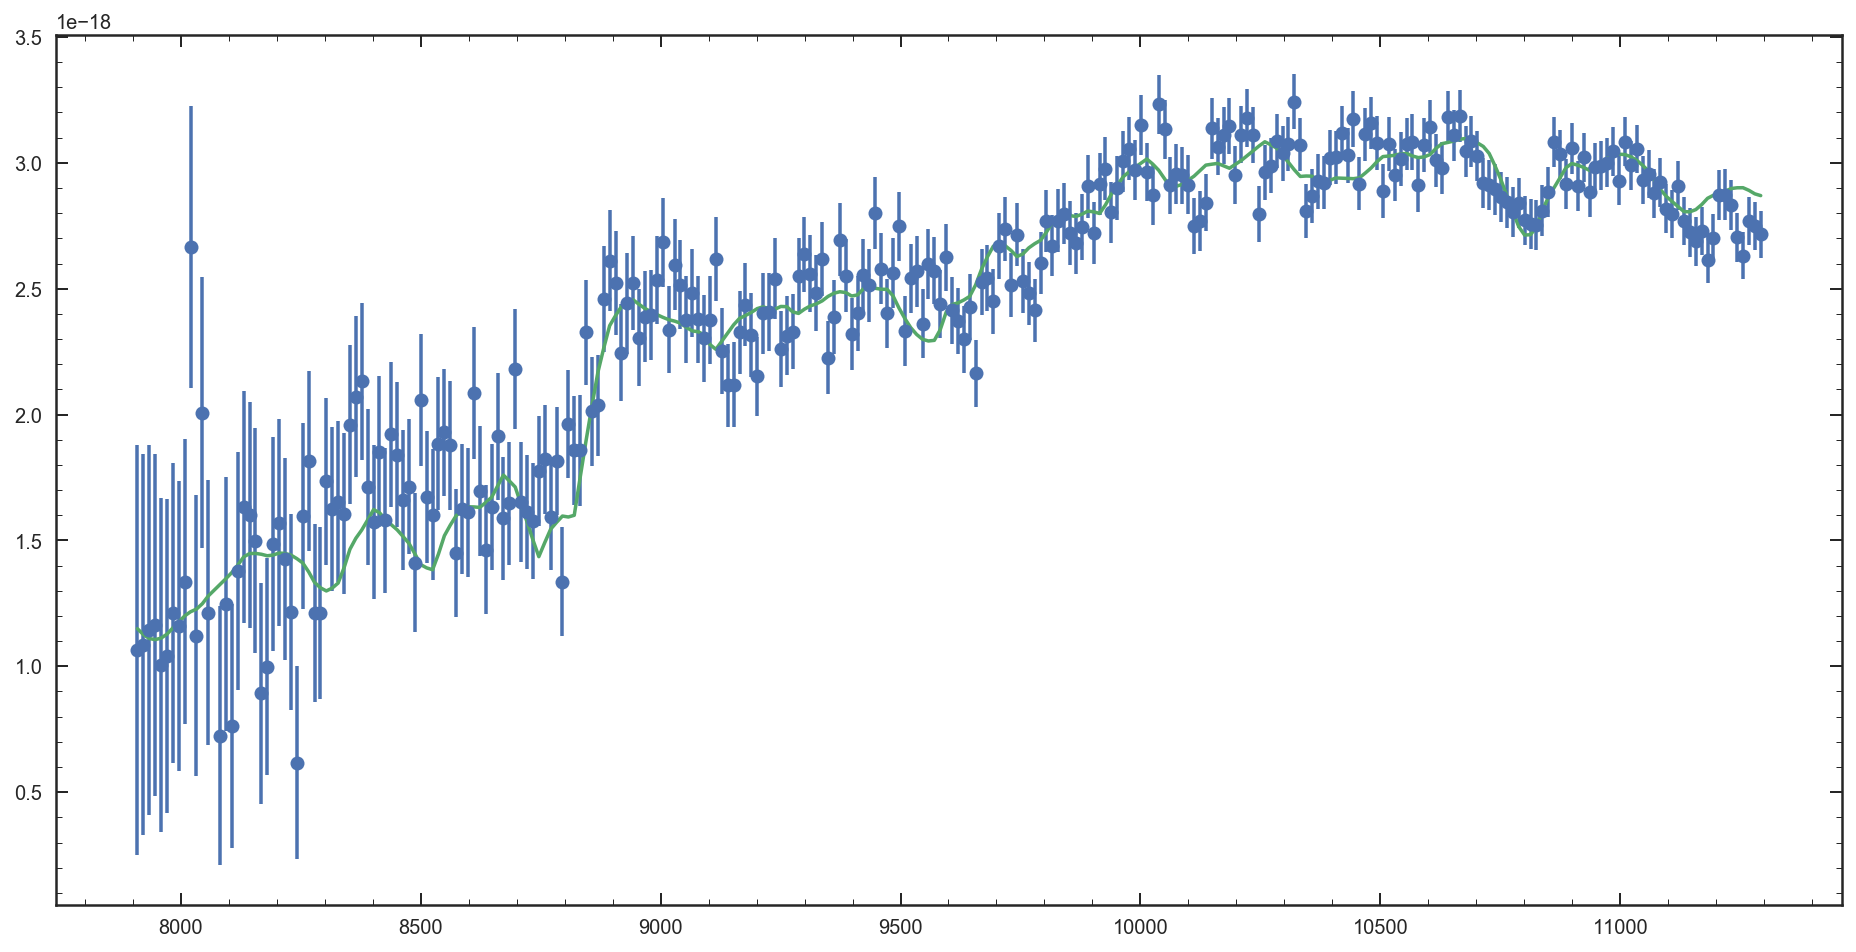

In [33]:
plt.figure(figsize=[16,8])
plt.errorbar(spec_t.gal_wv,spec_t.gal_fl,spec_t.gal_er,fmt='o')
plt.plot(spec_t.gal_wv,spec_t.fl)

plt.figure(figsize=[16,8])
plt.errorbar(spec.gal_wv,spec.gal_fl,spec.gal_er,fmt='o')
plt.plot(spec.gal_wv,spec.fl)

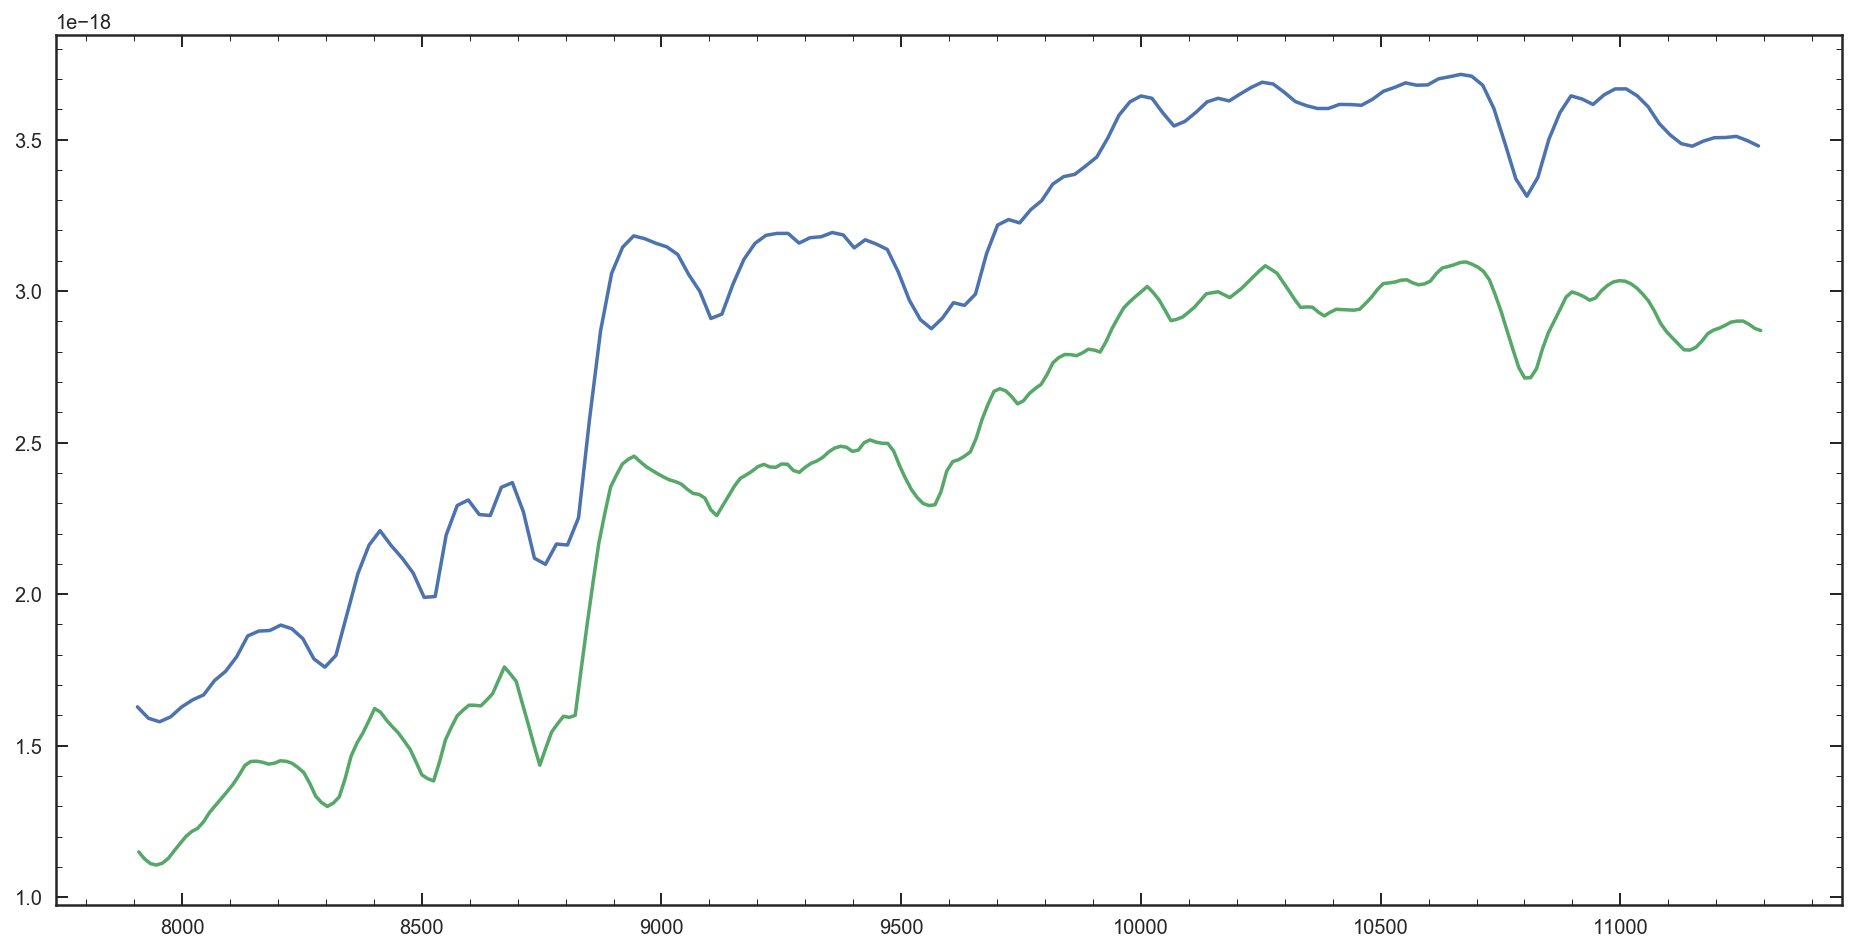

In [31]:
plt.figure(figsize=[16,8])
plt.plot(spec_t.gal_wv,spec_t.fl)
plt.plot(spec.gal_wv,spec.fl)

In [47]:
###DATA
P = np.load('../chidat/s39170_dtau_tZ_pos_lwa_3.npy')
t,Pt = np.load('../chidat/s39170_dtau_t_pos_lwa_3.npy')
Z,PZ = np.load('../chidat/s39170_dtau_Z_pos_lwa_3.npy')
onesig,twosig = Likelihood_contours(age,metal,P)
levels = np.array([twosig,onesig])

P2 = np.load('../chidat/s39170_griz_ex_tZ_pos.npy')
t,Pt2 = np.load('../chidat/s39170_griz_ex_t_pos.npy')
Z,PZ2 = np.load('../chidat/s39170_griz_ex_Z_pos.npy')
onesig,twosig = Likelihood_contours(age,metal,P2)
levels2 = np.array([twosig,onesig])

(0, 3.2440079833126846448)

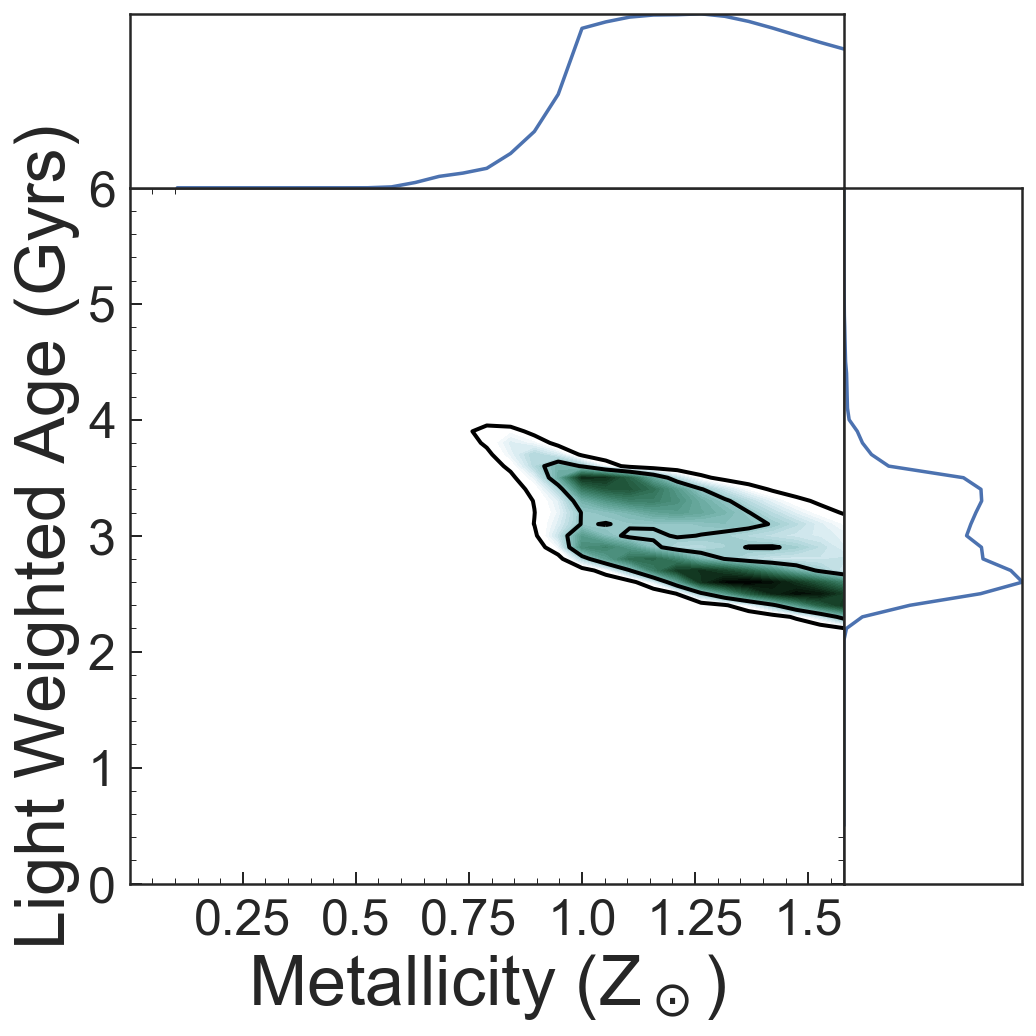

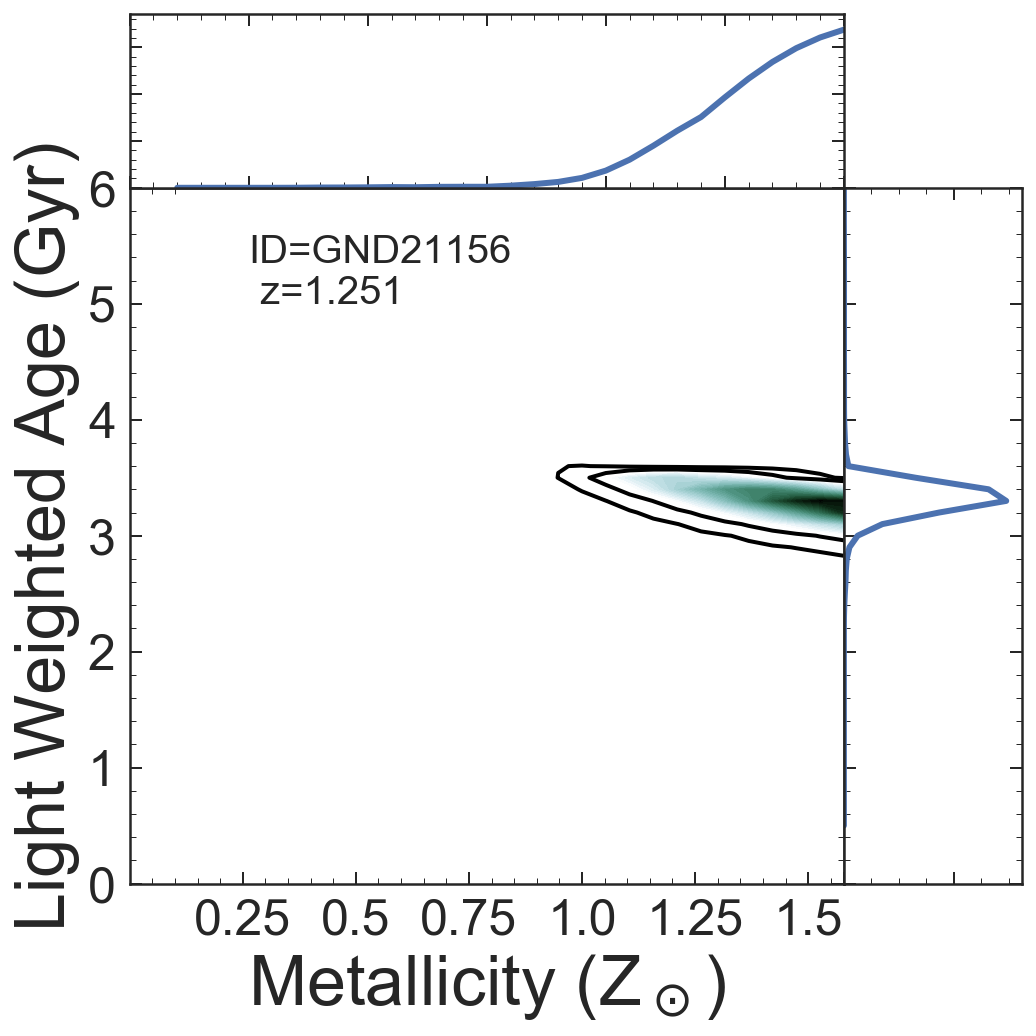

In [48]:
%matplotlib inline

###PLOT
gs = gridspec.GridSpec(2,2,height_ratios=[1,4],width_ratios=[4,1],hspace=0,wspace=0)
plt.figure(figsize=[8,8])

plt.subplot(gs[2])
plt.contour(M,A,P,levels,colors='k',linewidths=2)
plt.contourf(M,A,P,40,cmap=cmap)
plt.axis([0,0.03,0,6])
plt.xlabel('Metallicity (Z$_\odot$)',size=35)
plt.ylabel('Light Weighted Age (Gyrs)',size=35)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.xticks([ 0.00475,  0.0095 ,  0.01425,  0.019  ,  0.02375,  0.0285 ],[0.25,.5,0.75,1.0,1.25,1.5])

plt.subplot(gs[0])
plt.plot(Z,PZ)
plt.xticks([])
plt.yticks([])
plt.xlim(0,0.03)
plt.ylim(0,max(PZ))

plt.subplot(gs[3])
plt.plot(Pt,t)
plt.xticks([])
plt.yticks([])
plt.ylim(0,6)
plt.xlim(0,max(Pt))


gs = gridspec.GridSpec(2,2,height_ratios=[1,4],width_ratios=[4,1],hspace=0,wspace=0)
plt.figure(figsize=[8,8])

plt.subplot(gs[2])
plt.contour(M,A,P2,levels,colors='k',linewidths=2)
plt.contourf(M,A,P2,40,cmap=cmap)
plt.axis([0,0.03,0,6])
plt.xlabel('Metallicity (Z$_\odot$)',size=35)
plt.ylabel('Light Weighted Age (Gyr)',size=35)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.xticks([ 0.00475,  0.0095 ,  0.01425,  0.019  ,  0.02375,  0.0285 ],[0.25,.5,0.75,1.0,1.25,1.5])
plt.text(.005,5,'ID=GND21156\n z=1.251', fontsize=20)

plt.subplot(gs[0])
plt.plot(Z,PZ2,linewidth=3)
plt.gca().tick_params(axis='y',labelleft='off')
plt.gca().tick_params(axis='x',labelbottom='off')
plt.xlim(0,0.03)
plt.ylim(0,max(PZ2)*1.1)

plt.subplot(gs[3])
plt.plot(Pt2,t,linewidth=3)
plt.gca().tick_params(axis='y',labelleft='off')
plt.gca().tick_params(axis='x',labelbottom='off')
plt.ylim(0,6)
plt.xlim(0,max(Pt2)*1.1)



In [52]:
2.2*6800

14960.000000000002